In [18]:
%matplotlib inline
#%matplotlib widget

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import date
from datetime import timedelta
print(plt.style.available)
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 16, 10

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [6]:
# Read in the data
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url,sep=",")
data

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [7]:
# to explicitly convert the date column to type DATETIME
data['Date'] = pd.to_datetime(data['Date'])
print(data.dtypes)
data = data.set_index('Date')
data

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [8]:
data_freq = data.asfreq('D', method = 'ffill')
data_freq

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [10]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_weekly_mean = data[data_columns].resample('W').mean()
data_weekly_mean

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


In [11]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_monthly_max = data[data_columns].resample('M').max() # W stands for weekly
data_monthly_max

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,1613.31200,NaN,NaN,NaN
2006-02-28,1606.66700,NaN,NaN,NaN
2006-03-31,1545.83400,NaN,NaN,NaN
2006-04-30,1447.79800,NaN,NaN,NaN
2006-05-31,1380.17500,NaN,NaN,NaN
...,...,...,...,...
2017-08-31,1434.05200,455.379,216.117,601.010
2017-09-30,1460.61621,761.751,168.123,838.572
2017-10-31,1508.51484,819.818,123.715,846.617


In [12]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_7d_rol = data[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429
2017-12-28,1203.265211,604.699143,19.240143,623.939286
2017-12-29,NaN,NaN,NaN,NaN


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Trends in Electricity Consumption')

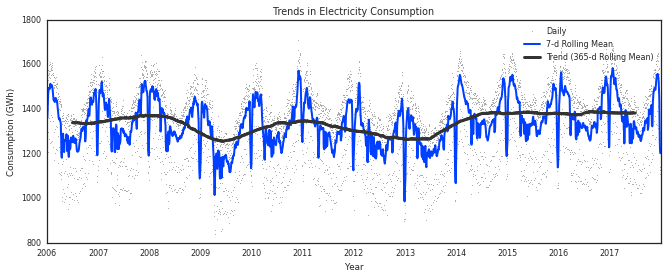

In [26]:
data_365d_rol = data[data_columns].rolling(window = 365, center = True).mean()

print(plt.style.available)
plt.style.use('seaborn-white')


fig, ax = plt.subplots(figsize = (11,4))
# plotting daily data
ax.plot(data['Consumption'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(data_7d_rol['Consumption'], linewidth=2, label='7-d Rolling Mean')
# plotting annual rolling data
ax.plot(data_365d_rol['Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')
# Beautification of plot
ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

## Differencing to de-trend the data
Sometimes it would be beneficial to remove the trend from our data, especially if it is quite pronounced (as seen in Fig 3), so we can assess the seasonal variation (more on this in a few minutes) or the noise in our time series. Removing the trend (or de-trending) can also simplify the modeling process and improve model performance.
A time series with a trend is called non-stationary.
A time series that does not have a trend or has the trend removed is said to be stationary.
Detrended time series is used as input for learning algorithms such as ARIMA (Python library for analyzing and forecasting time series data) or it can also be used as an additional input for a machine learning algorithm.
How to remove trend from time series?
We can remove the trend by using a method known as differencing. It essentially means creating a new time series wherein
value at time (t)= original value at time (t) - original value at time (t-1)
Differencing is super helpful in turning your time series into a stationary time series.

P.S: In case 1st order differencing is unable to remove the trend, you can perform 2nd order differencing using the formula:
value at time (t)= original value at time (t) — 2 *original value at time (t-1) + original value at time (t-2)

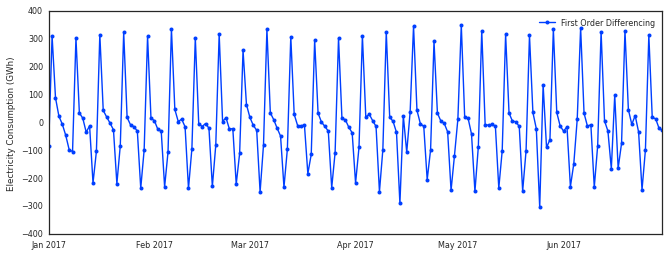

In [28]:
# creating the first order differencing data
# Note that this is difference from one day to the next, not year over year

data_first_order_diff = data[data_columns].diff()

start, end = '2017-01', '2017-06'

fig, ax = plt.subplots(figsize=(11, 4))

ax.plot(data_first_order_diff.loc[start:end, 'Consumption'],
marker='o', markersize=4, linestyle='-', label='First Order Differencing')
ax.set_ylabel('Electricity Consumption (GWh)')
ax.legend();

## Seasonality (or Periodicity)
A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months, every 1 week, every 4 months, and so on.
Let us check if our time series has some seasonality element to it.

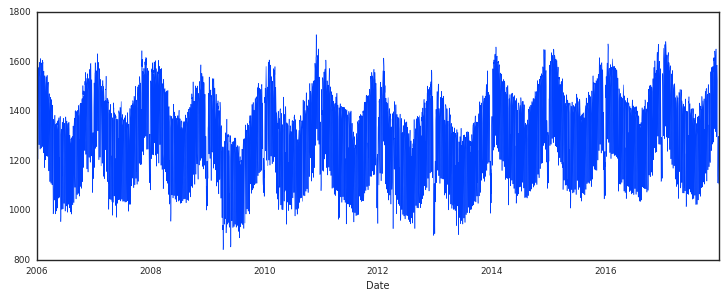

In [29]:
plt.figure(figsize=(11,4), dpi= 80)
data['Consumption'].plot(linewidth = 0.5)

This shows strong yearly seasonality.   We can also look at weekly seasonality...

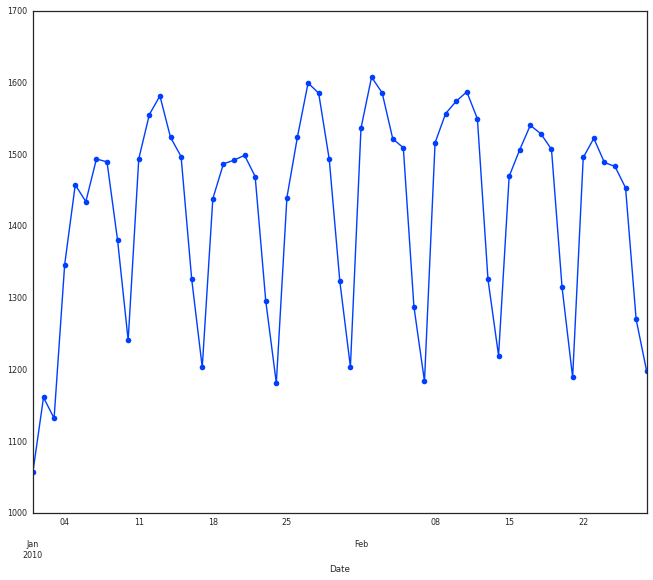

In [30]:
data.loc['2010-01': '2010-02','Consumption'].plot(marker = 'o', figsize=(11, 9))

## Autocorrelation
Autocorrelation is a technique for analyzing seasonality. It plots the correlation of the time series with itself at a different time lag.
Confusing much?
I learned a great intuitive way to understand autocorrelation using the tutorial [here](https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial). It basically says, if you take a time series and move it by 12 months (lag = 12) backwards or forwards, it would map onto itself in some way. Autocorrelation is a way of telling how good this mapping is. If it is very good, it means the time series and the shifted time series are almost similar and the correlation at that time lag would be high. The correlation of a time series with such a shifted version of itself is captured by the concept of autocorrelation (big shout out to Hugo Bowne-Anderson for this wonderful explanation, which I have re-iterated here).

Before I show what the plot looks like, it would be nice to give heads up on how to read the plot. On the x-axis, you have the lag and on the y-axis, you have how correlated the time series is with itself at that lag. If the original consumption time series repeats itself every two days, you would expect to see a spike in the autocorrelation plot at a lag of 2 days.

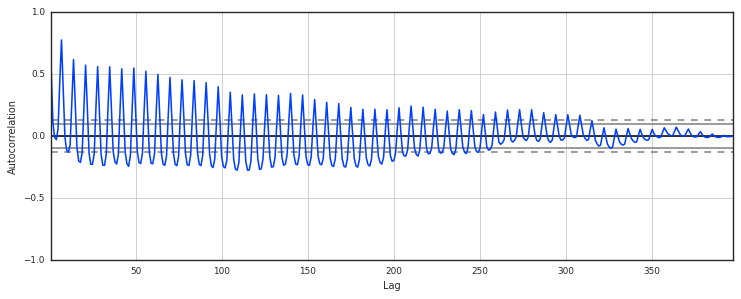

In [32]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(data.loc['2012-01': '2013-01', 'Consumption']);

From the plot, we can see there is a high peak in correlation at the lag of 7th day, then again on the 14th day, and so on. Which means the time series repeats every 7 days i.e. weekly. This pattern wears off after 3 months (100 days approximately). As you move further away, there’s less and less of a correlation.
The dotted lines in the above plot actually tell you about the statistical significance of the correlation. Each spike that rises above or falls below the dashed lines is considered to be statistically significant.
Thus, we can be sure the consumption series is genuinely autocorrelated with a lag of 1 week.
Note: For brevity, we have only plotted the autocorrelation plot for a subset of our time-series data. If we are to expand to include the complete dataset, the autocorrelation plot would still look pretty much the same.

## Important feature extraction
At times, it would be essential to extract the month, day of the week, date, etc for each timestamp (i.e. each row of our data). Since we already have the indices set in the DateTime format, extracting these elements become super easy:

We can also use these additional features as inputs in our models. 
These additional features can also be useful for exploratory analysis of your dataset. For instance, we can plot the median power consumption for each month.

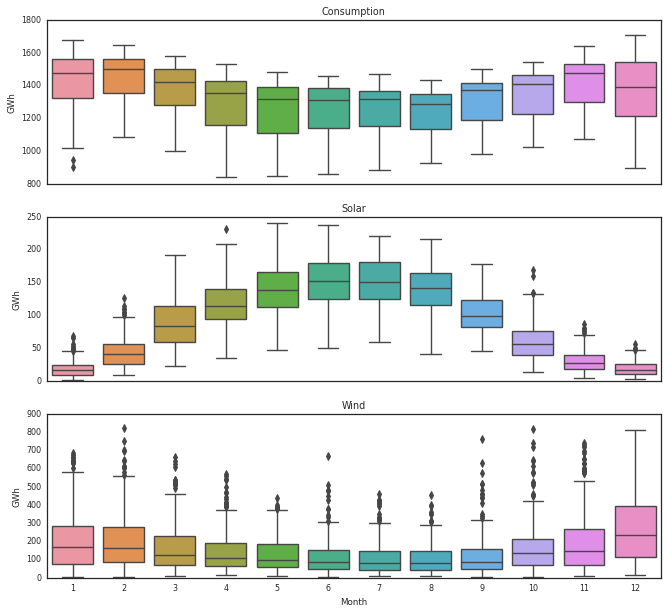

In [35]:
# Extract the year, month, date separately using the index set
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday_Name'] = data.index.weekday

fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=data, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Keep the x-axis label for only the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')